In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [187]:
parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/dvcs/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/exp/"

# parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl/exp/"

# df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")

# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_036.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_036.pkl")

In [132]:
# df_3987_corr = df_3987_corr.loc[np.abs(df_3987_corr.Pchi2pid) < 2.46]
# df_4076_1g_corr = df_4076_1g_corr.loc[np.abs(df_4076_1g_corr.Pchi2pid) < 2.46]
# df_4076_2g_corr = df_4076_2g_corr.loc[np.abs(df_4076_2g_corr.Pchi2pid) < 2.46]
# exp_1g_corr = exp_1g_corr.loc[np.abs(exp_1g_corr.Pchi2pid) < 2.46]
# exp_2g_corr = exp_2g_corr.loc[np.abs(exp_2g_corr.Pchi2pid) < 2.46]

In [133]:
# parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl/exp/"

# # df_3063_corr = pd.read_pickle(parent_MC + "3063.pkl")
# df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
# df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3292.pkl")
# df_3292_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3292.pkl")
# df_4013_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4013.pkl")
# df_4013_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4013.pkl")
# exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
# exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

In [134]:
# parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl/exp/"

# df_3063_corr = pd.read_pickle(parent_MC + "3063.pkl")
# df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
# df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
# df_4013_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4013.pkl")
# df_4013_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4013.pkl")
# exp_1g = pd.read_pickle(parent_exp + "dvcs.pkl")
# exp_2g = pd.read_pickle(parent_exp + "pi0.pkl")

In [135]:
dvcsSimInb = df_3987_corr
# bkgSimInb = pd.concat([df_3274_1g_corr, df_3284_1g_corr, df_3292_1g_corr])
# pi0SimInb = pd.concat([df_3274_2g_corr, df_3284_2g_corr, df_3292_2g_corr])
bkgSimInb = df_4076_1g_corr
pi0SimInb = df_4076_2g_corr

In [188]:
epgExpInbFD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.4)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))& (exp_1g_corr.Gsector<7)])
pi0ExpInbFD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.4)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])

epgExpInbCD = copy(exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector<7)])
pi0ExpInbCD = copy(exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])
# 
epgExpInbCDFT = exp_1g_corr.loc[(exp_1g_corr.Ee>2)&(exp_1g_corr.Ge>3)&(exp_1g_corr.Pp>0.25)&(exp_1g_corr.Pp<0.8)&((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
pi0ExpInbCDFT = exp_2g_corr.loc[(exp_2g_corr.Ee>2)&(exp_2g_corr.Ge>3)&(exp_2g_corr.Pp>0.25)&(exp_2g_corr.Pp<0.8)&((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]

# dvcsSimInbFD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.4)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
# bkgSimInbFD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.4)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])
# pi0SimInbFD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.4)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector<7)&(pi0SimInb.Ptheta<32))& (pi0SimInb.Gsector<7)])

# dvcsSimInbCD = copy(dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
# bkgSimInbCD = copy(bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
# pi0SimInbCD = copy(pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)])

# dvcsSimInbCDFT = dvcsSimInb.loc[(dvcsSimInb.Ee>2)&(dvcsSimInb.Ge>3)&(dvcsSimInb.Pp>0.25)&(dvcsSimInb.Pp<0.8)&((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
# bkgSimInbCDFT = bkgSimInb.loc[(bkgSimInb.Ee>2)&(bkgSimInb.Ge>3)&(bkgSimInb.Pp>0.25)&(bkgSimInb.Pp<0.8)&((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
# pi0SimInbCDFT = pi0SimInb.loc[(pi0SimInb.Ee>2)&(pi0SimInb.Ge>3)&(pi0SimInb.Pp>0.25)&(pi0SimInb.Pp<0.8)&((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]
# epgExpInbFD = copy(exp_1g_corr.loc[((exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<32))& (exp_1g_corr.Gsector<7)])
# pi0ExpInbFD = copy(exp_2g_corr.loc[((exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<32))& (exp_2g_corr.Gsector<7)])
# dvcsSimInbFD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
# bkgSimInbFD = copy(bkgSimInb.loc[((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])
# pi0SimInbFD = copy(pi0SimInb.loc[((pi0SimInb.Psector<7)&(pi0SimInb.Ptheta<32))& (pi0SimInb.Gsector<7)& (pi0SimInb.Gsector2<7)])

# epgExpInbCD = copy(exp_1g_corr.loc[((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector<7)])
# pi0ExpInbCD = copy(exp_2g_corr.loc[((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector<7)& (exp_2g_corr.Gsector2<7)])
# dvcsSimInbCD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
# bkgSimInbCD = copy(bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
# pi0SimInbCD = copy(pi0SimInb.loc[((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector<7)])

# epgExpInbCDFT = exp_1g_corr.loc[((exp_1g_corr.Psector>7)&(exp_1g_corr.Ptheta<60))& (exp_1g_corr.Gsector>7)]
# pi0ExpInbCDFT = exp_2g_corr.loc[((exp_2g_corr.Psector>7)&(exp_2g_corr.Ptheta<60))& (exp_2g_corr.Gsector>7)& (exp_2g_corr.Gsector2>7)]
# dvcsSimInbCDFT = dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
# bkgSimInbCDFT = bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]
# pi0SimInbCDFT = pi0SimInb.loc[((pi0SimInb.Psector>7)&(pi0SimInb.Ptheta<60))& (pi0SimInb.Gsector>7)]

In [189]:
# epgExpInb = pd.concat([epgExpInbFD, epgExpInbCD, epgExpInbCDFT])
# pi0ExpInb = pd.concat([pi0ExpInbFD, pi0ExpInbCD, pi0ExpInbCDFT])
# dvcsSimInb = pd.concat([dvcsSimInbFD, dvcsSimInbCD, dvcsSimInbCDFT])
# bkgSimInb = pd.concat([bkgSimInbFD, bkgSimInbCD, bkgSimInbCDFT])
# pi0SimInb = pd.concat([pi0SimInbFD, pi0SimInbCD, pi0SimInbCDFT])

epgExpInb = pd.concat([epgExpInbCD, epgExpInbCDFT])
pi0ExpInb = pd.concat([pi0ExpInbCD, pi0ExpInbCDFT])
# dvcsSimInb = pd.concat([dvcsSimInbCD, dvcsSimInbCDFT])
# bkgSimInb = pd.concat([bkgSimInbCD, bkgSimInbCDFT])
# pi0SimInb = pd.concat([pi0SimInbCD, pi0SimInbCDFT])


In [11]:
# epgExpInb = pd.concat([epgExpInbFD, epgExpInbCD, epgExpInbCDFT])
# pi0ExpInb = pd.concat([pi0ExpInbFD, pi0ExpInbCD])
# dvcsSimInb = pd.concat([dvcsSimInbFD, dvcsSimInbCD, dvcsSimInbCDFT])
# bkgSimInb = pd.concat([bkgSimInbFD, bkgSimInbCD, bkgSimInbCDFT])
# pi0SimInb = pd.concat([pi0SimInbFD, pi0SimInbCD])


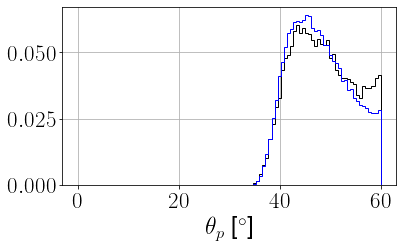

In [81]:
pi0ExpInb.Ptheta.hist(bins= np.linspace(0, 60, 101), histtype = 'step', density = True, edgecolor = 'k')
pi0SimInb.Ptheta.hist(bins= np.linspace(0, 60, 101), histtype = 'step', density = True, edgecolor = 'b')
plt.xlabel(r"$\theta_{p}$"+" ["+degree+"]")
plt.show()

<AxesSubplot:>

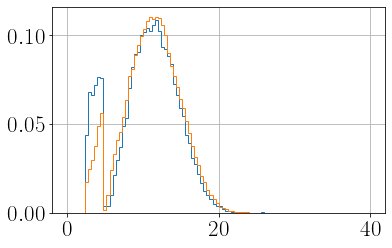

In [143]:
pi0ExpInb.Gtheta.hist(density = True, bins = np.linspace(0, 40, 101), histtype = 'step')
pi0SimInb.Gtheta.hist(density = True, bins = np.linspace(0, 40, 101), histtype = 'step')

<AxesSubplot:>

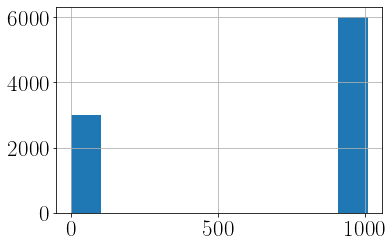

In [110]:
pi0SimInbCDFT.Gsector2.hist()

In [58]:
print(len(epgExpInbFD), len(epgExpInbCD), len(epgExpInbCDFT))

24455 155542 142186


In [157]:
print(len(epgExpInbCD), len(epgExpInbCDFT))

153277 142556


In [117]:
print(len(dvcsSimInbCD), len(dvcsSimInbCDFT))

263638 245265


In [190]:
cont = len(pi0ExpInb)*len(bkgSimInb)/len(pi0SimInb)/len(epgExpInb)
contCD = len(pi0ExpInbCD)*len(bkgSimInbCD)/len(pi0SimInbCD)/len(epgExpInbCD)
# contFD = len(pi0ExpInbFD)*len(bkgSimInbFD)/len(pi0SimInbFD)/len(epgExpInbFD)
contCDFT = len(pi0ExpInbCDFT)*len(bkgSimInbCDFT)/len(pi0SimInbCDFT)/len(epgExpInbCDFT)
# print(cont, contFD, contCD, contCDFT)
# contFD=0.45

Etheta 17.27225696465561
Ptheta 53.87465426860856
Gtheta 5.116346580667528
Ephi -5.811375373241752
Pphi -5.4179813249943205
Gphi 2.5053136682238444


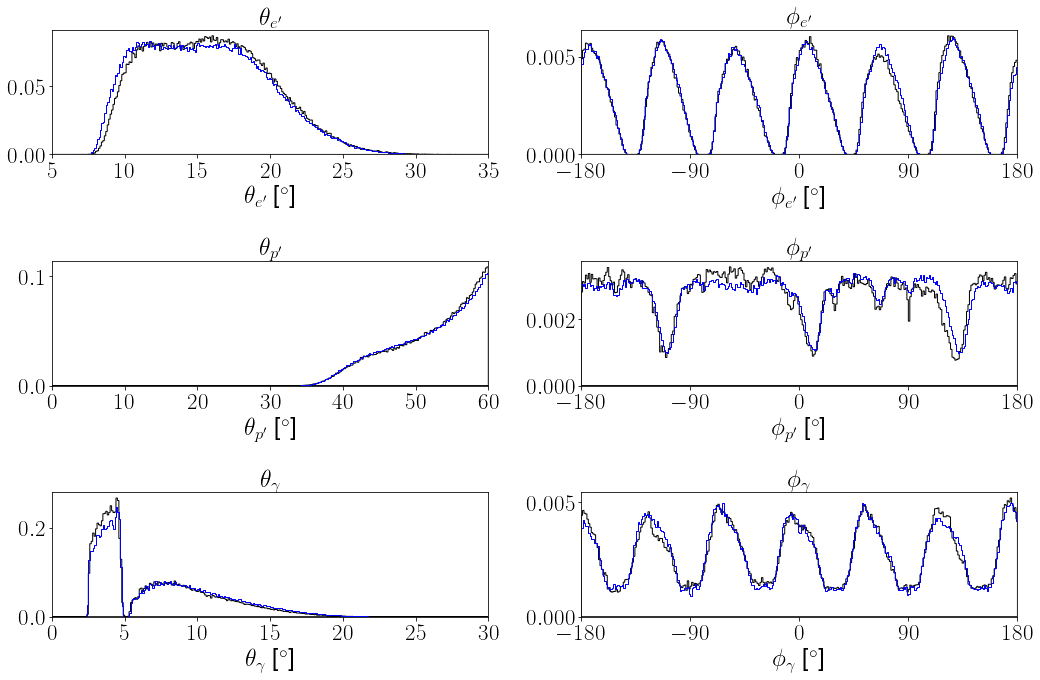

<Figure size 432x288 with 0 Axes>

In [175]:
varstoplot = ["Etheta", "Ephi", "Ptheta", "Pphi", "Gtheta", "Gphi"]
title = [r"$\theta_{e'}$", r"$\phi_{e'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$" ]
unit = [degree, degree, degree, degree, degree, degree]
binstarts = [5, -180, 0, -180, 0, -180]
binends = [35, 180, 60, 180, 30, 180]
fig, axs = plt.subplots(3, 2, figsize = (15, 10))
for xind in range(0, 2):
    for yind in range(0, 3):
        ind =xind+2*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 301)
        simDist_dvpi0, bins = np.histogram(bkgSimInb[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInb[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0 + (len_epgExpInb/len_dvcsSimInb-len_bkgSimInb/len_pi0SimInb*len_pi0ExpInb/len_dvcsSimInb)*simDist_dvcs
        simDist = (1-cont)*simDist_dvcs + cont*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInb[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInb-cont_inb_/len_dvcsSimInb)*len_epgExpInb*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInb[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInb[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInb)/len(pi0SimInb)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
axs[0,1].set_xticks([-180, -90, 0, 90, 180])
axs[1,1].set_xticks([-180, -90, 0, 90, 180])
axs[2,1].set_xticks([-180, -90, 0, 90, 180])
plt.tight_layout()
# plt.savefig("kine.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

Ep 3.0556742858140167
Pp 0.5342153716868256
Gp 7.320260254831597
Etheta 17.27225696465561
Ptheta 53.87627140184274
Gtheta 5.116346580667528
Ephi -5.811375373241752
Pphi -5.4179813249943205
Gphi 2.5053136682238444


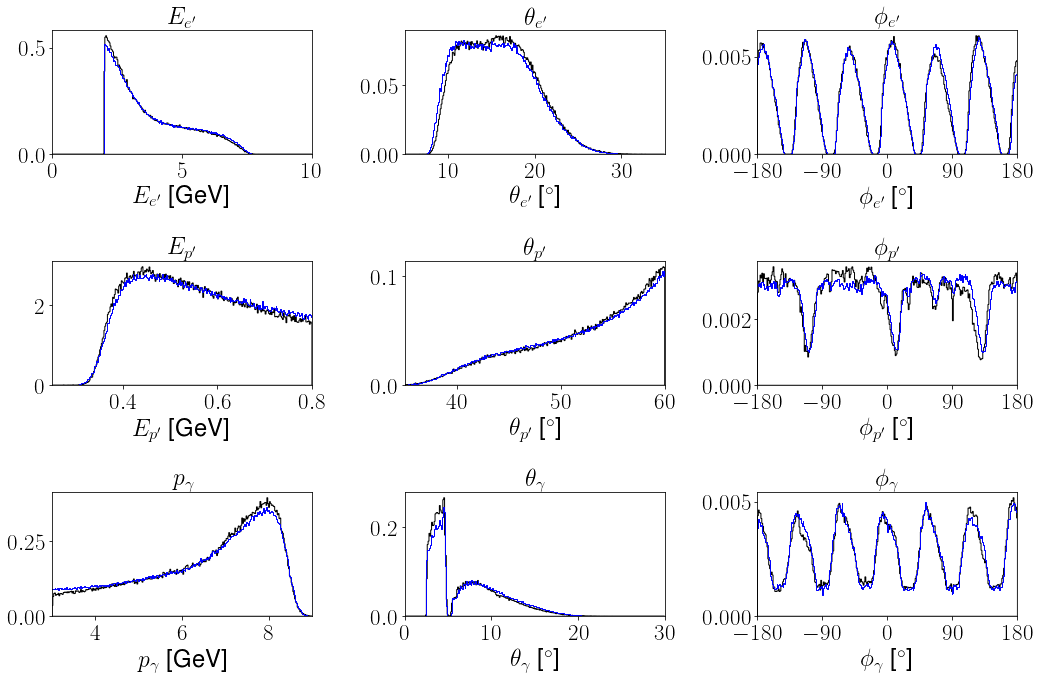

<Figure size 432x288 with 0 Axes>

In [176]:
varstoplot = ["Ep", "Etheta", "Ephi", "Pp", "Ptheta", "Pphi", "Gp", "Gtheta", "Gphi"]
title = [r"$E_{e'}$", r"$\theta_{e'}$", r"$\phi_{e'}$", r"$E_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$" ]
unit = [GeV, degree, degree, GeV, degree, degree, GeV, degree, degree]
binstarts = [0, 5, -180, 0.25, 35, -180, 3, 0, -180]
binends = [10, 35, 180, 0.8, 60, 180, 9, 30, 180]
fig, axs = plt.subplots(3, 3, figsize = (15, 10))
for xind in range(0, 3):
    for yind in range(0, 3):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 301)
        simDist_dvpi0, bins = np.histogram(bkgSimInb[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInb[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0 + (len_epgExpInb/len_dvcsSimInb-len_bkgSimInb/len_pi0SimInb*len_pi0ExpInb/len_dvcsSimInb)*simDist_dvcs
        simDist = (1-cont)*simDist_dvcs + cont*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInb[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInb-cont_inb_/len_dvcsSimInb)*len_epgExpInb*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInb[varstoplot[ind]]+0.01, bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInb[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInb/len_pi0SimInb*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInb)/len(pi0SimInb)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
axs[0,2].set_xticks([-180, -90, 0, 90, 180])
axs[1,2].set_xticks([-180, -90, 0, 90, 180])
axs[2,2].set_xticks([-180, -90, 0, 90, 180])
plt.tight_layout()
# plt.savefig("kine.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

nu 5.331857806419235
xB 0.3882646230599767
W 2.6687160985547984
t2 0.3896384982522386
Q2 4.041160769509021
phi2 173.19497094037928


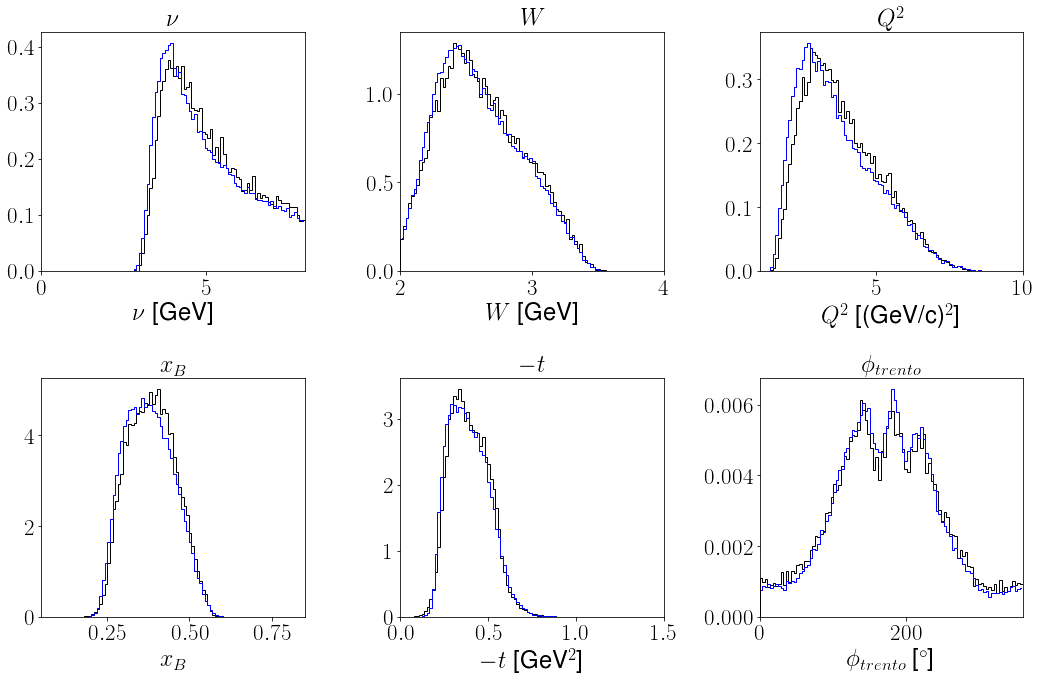

<Figure size 432x288 with 0 Axes>

In [191]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 1, 0.05, 0, 0]
binends = [8, 4, 10, 0.85, 1.5, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

Ep 5.067477953257777
Pp 0.6368859877101423
Gp 5.152194948104785
Etheta 16.536338435005824
Ptheta 24.411858720021463
Gtheta 15.882742270401074
Ephi -4.50099964657707
Pphi -1.9880722378950233
Gphi -1.3657728962655675


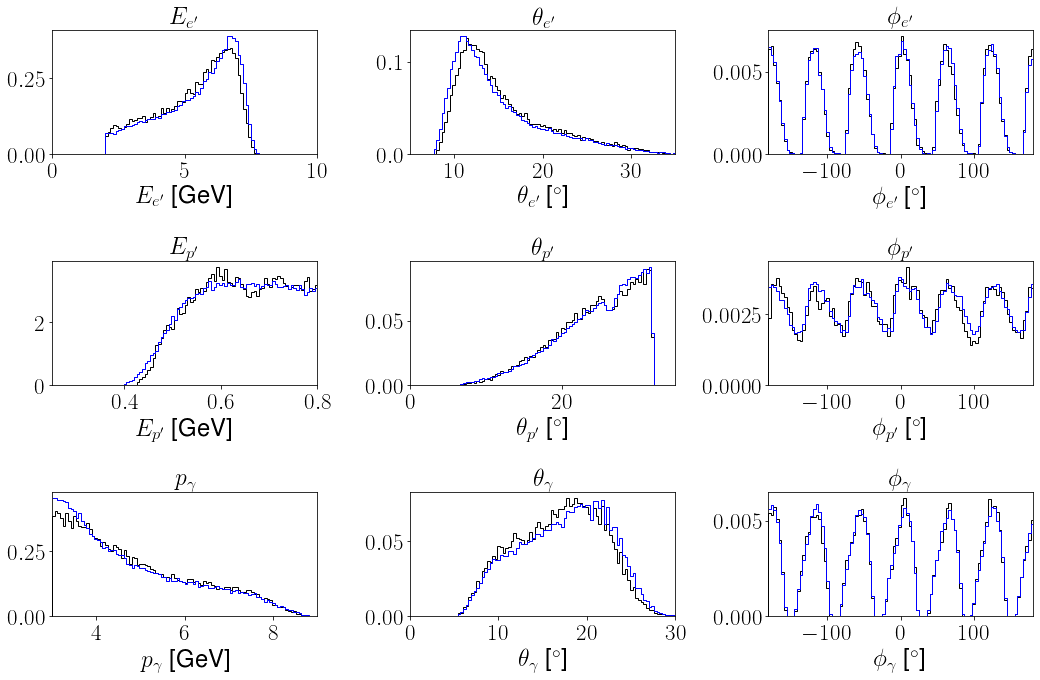

<Figure size 432x288 with 0 Axes>

In [192]:
varstoplot = ["Ep", "Etheta", "Ephi", "Pp", "Ptheta", "Pphi", "Gp", "Gtheta", "Gphi"]
title = [r"$E_{e'}$", r"$\theta_{e'}$", r"$\phi_{e'}$", r"$E_{p'}$", r"$\theta_{p'}$", r"$\phi_{p'}$", r"$p_{\gamma}$", r"$\theta_{\gamma}$", r"$\phi_{\gamma}$" ]
unit = [GeV, degree, degree, GeV, degree, degree, GeV, degree, degree]
binstarts = [0, 5, -180, 0.25, 0, -180, 3, 0, -180]
binends = [10, 35, 180, 0.8, 35, 180, 9, 30, 180]
fig, axs = plt.subplots(3, 3, figsize = (15, 10))
for xind in range(0, 3):
    for yind in range(0, 3):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 32.346815002173145
reconGam 0.6716850961675621
coplanarity 3.829755881262623
ME_epg 0.17108076066353411
MM2_epg -0.0009933218088293493
MM2_eg 0.9917135405705263
MM2_ep 0.016134070062788226
MPt 0.07720720949272344


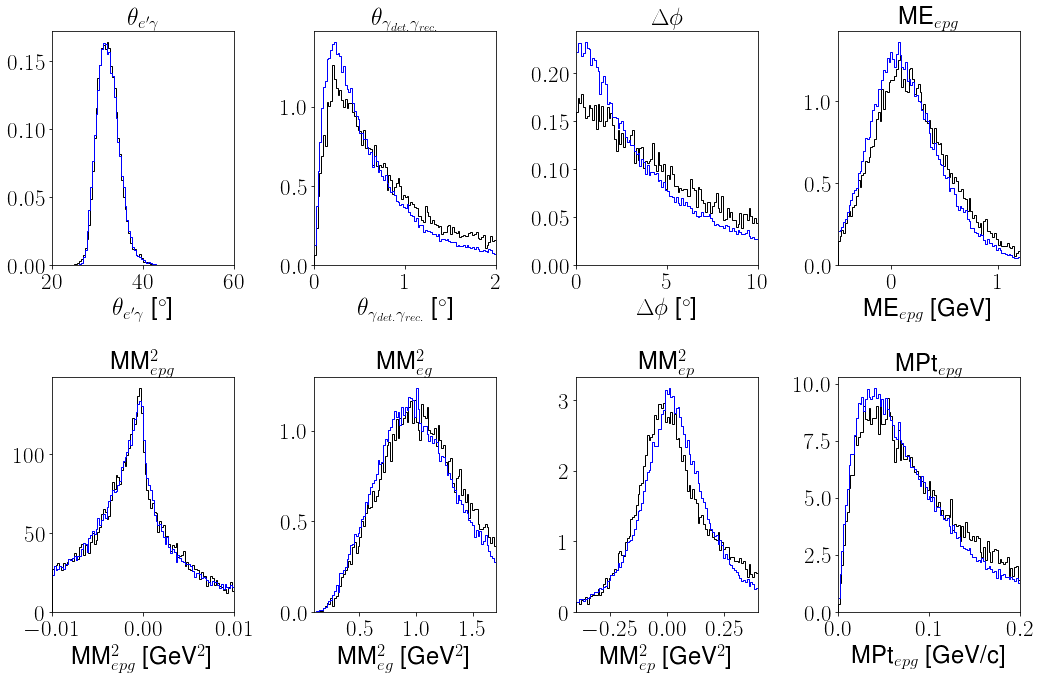

<Figure size 432x288 with 0 Axes>

In [183]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, contFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-contFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

coneAngle 23.129431607223882
reconGam 0.531216409184437
coplanarity 2.6346412802617434
ME_epg 0.12770386282576437
MM2_epg -0.001286011475521562
MM2_eg 0.9009581317306626
MM2_ep -0.0023446745046640724
MPt 0.061396695053576436


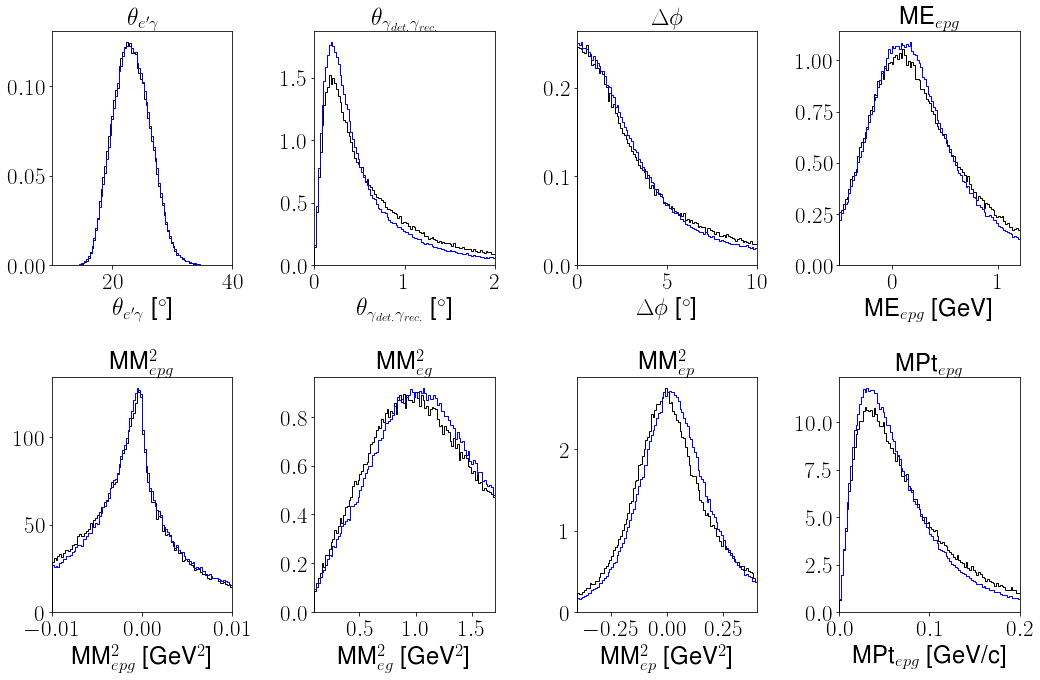

<Figure size 432x288 with 0 Axes>

In [193]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0 + (len_epgExpInbCD/len_dvcsSimInbCD-len_bkgSimInbCD/len_pi0SimInbCD*len_pi0ExpInbCD/len_dvcsSimInbCD)*simDist_dvcs
        simDist = (1-contCD)*simDist_dvcs + contCD*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD-cont_inb_CD/len_dvcsSimInbCD)*len_epgExpInbCD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD/len_pi0SimInbCD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

Pp 0.4799875560412031
reconGam 0.32860920153167156
coplanarity 1.6220587820892407
ME_epg -0.3747425558694671
MM2_epg -0.00325158977898574
MM2_eg 0.6815058240895382
MM2_ep -0.03754273116991835
MPt 0.02429335877267995


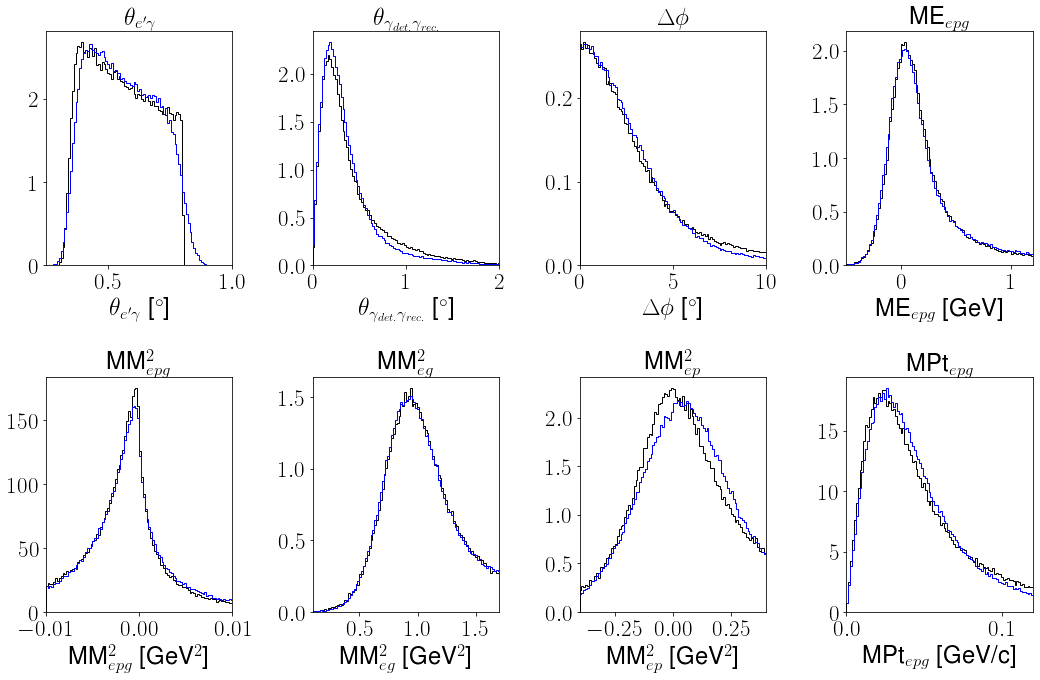

<Figure size 432x288 with 0 Axes>

In [206]:
varstoplot = ["Pp", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0.25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [1, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(smearingDVCS2(bkgSimInbCDFT, 0.05, 0, 0)[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(smearingDVCS2(dvcsSimInbCDFT, 0.05, 0, 0)[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [196]:
def smearingDVCS2(df_epg, sigma = 0, sigma2 = 0, sigma3 = 0):
    #set up dvcs variables
    df_epg = copy(df_epg)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
#     df_epg.loc[:, 'Ep'] = mag(ele)
#     df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
#     df_epg.loc[:, 'Etheta'] = getTheta(ele)
#     df_epg.loc[:, 'Ephi'] = getPhi(ele)

    df_epg.loc[df_epg.Psector>7, 'Pp'] = np.random.normal(1, sigma, len(df_epg.loc[df_epg.Psector>7]))*df_epg.loc[df_epg.Psector>7, 'Pp']
    df_epg.loc[df_epg.Psector>7, 'Ptheta'] = np.random.normal(0, sigma2, len(df_epg.loc[df_epg.Psector>7]))+df_epg.loc[df_epg.Psector>7, 'Ptheta']
    df_epg.loc[df_epg.Psector>7, 'Pphi'] = np.random.normal(0, sigma3, len(df_epg.loc[df_epg.Psector>7]))+df_epg.loc[df_epg.Psector>7, 'Pphi']
    df_epg.loc[df_epg.Psector>7, 'Pe'] = np.sqrt(df_epg.loc[df_epg.Psector>7, 'Pp']**2+M**2)
    df_epg.loc[:, "Ppx"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.cos(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppy"] = df_epg.loc[:, "Pp"]*np.sin(np.radians(df_epg.loc[:, "Ptheta"]))*np.sin(np.radians(df_epg.loc[:, "Pphi"]))
    df_epg.loc[:, "Ppz"] = df_epg.loc[:, "Pp"]*np.cos(np.radians(df_epg.loc[:, "Ptheta"]))
    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

#     df_epg.loc[:, 'Gp'] = np.random.normal(1, sigma, len(df_epg))*df_epg.loc[:, 'Gp']
#     df_epg.loc[:, 'Ge'] = df_epg.loc[:, 'Gp']
# #     df_epg.loc[:, 'Gtheta'] = getTheta(gam)
# #     df_epg.loc[:, 'Gphi'] = getPhi(gam)
#     df_epg.loc[:, "Gpx"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.cos(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpy"] = df_epg.loc[:, "Gp"]*np.sin(np.radians(df_epg.loc[:, "Gtheta"]))*np.sin(np.radians(df_epg.loc[:, "Gphi"]))
#     df_epg.loc[:, "Gpz"] = df_epg.loc[:, "Gp"]*np.cos(np.radians(df_epg.loc[:, "Gtheta"]))
    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    
    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)
    
    return df_epg


coneAngle 23.22781082600579
reconGam 0.36791014906605674
coplanarity 1.6220587820892407
ME_epg -0.37591194078196555
MM2_epg -0.003438748507421026
MM2_eg 0.6815058240895382
MM2_ep -0.04138937233020625
MPt 0.0271086573268311


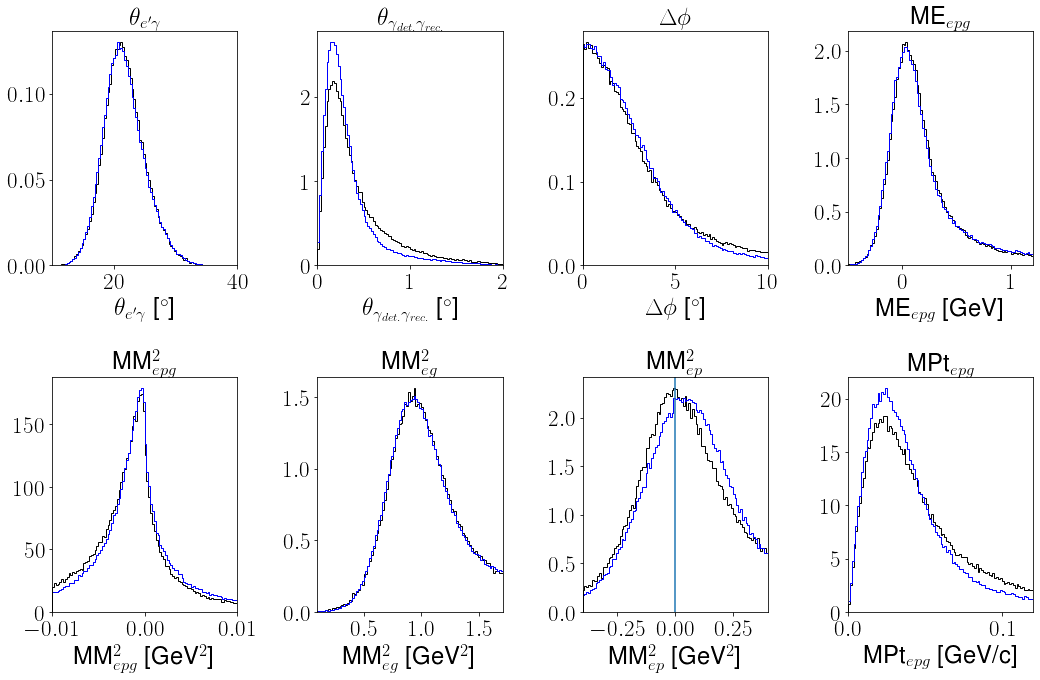

<Figure size 432x288 with 0 Axes>

In [195]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0 + (len_epgExpInbCDFT/len_dvcsSimInbCDFT-len_bkgSimInbCDFT/len_pi0SimInbCDFT*len_pi0ExpInbCDFT/len_dvcsSimInbCDFT)*simDist_dvcs
        simDist = (1-contCDFT)*simDist_dvcs + contCDFT*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCDFT[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCDFT-cont_inb_CDFT/len_dvcsSimInbCDFT)*len_epgExpInbCDFT*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCDFT[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCDFT/len_pi0SimInbCDFT*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCDFT)/len(pi0SimInbCDFT)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
axs[1, 2].axvline(0)

# plt.savefig("kineCDFT.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

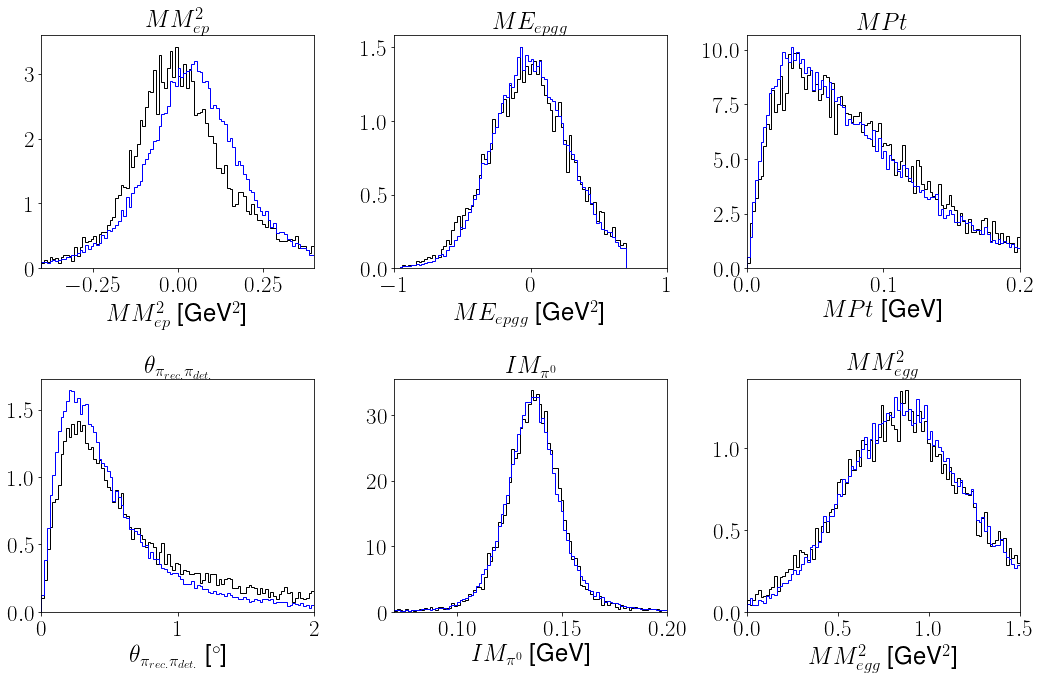

In [21]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, 0]
binends = [0.4, 1, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

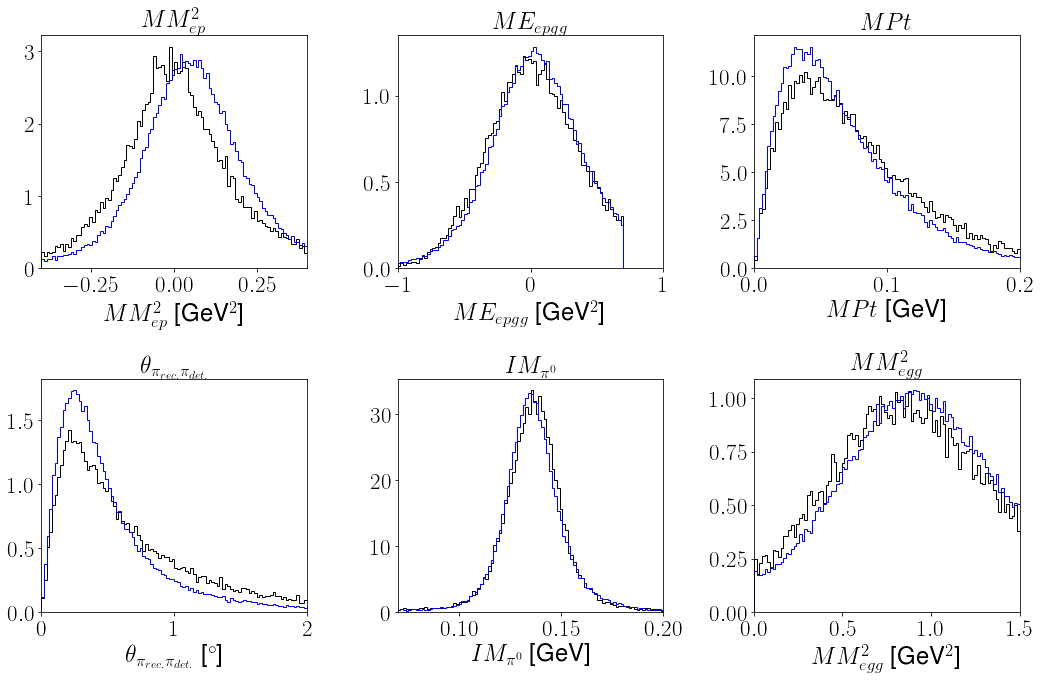

In [146]:
varstoplot = ["MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [-0.4, -1, 0, 0, 0.07, 0]
binends = [0.4, 1, 0.2, 2, 0.2, 1.5]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0ExpInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

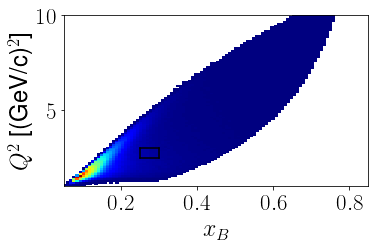

In [136]:
plt.hist2d(dvcsSimInb.xB, dvcsSimInb.Q2, bins = [np.linspace(0.05, 0.85, 101), np.linspace(1, 10, 101)], cmin = 1, cmap  = cmap)
plt.plot(np.linspace(0.25, 0.3, 101), np.linspace(2.5, 2.5 , 101), color = 'k')
plt.plot(np.linspace(0.25, 0.3, 101), np.linspace(3, 3 , 101), color = 'k')
plt.plot(np.linspace(0.25, 0.25, 101), np.linspace(2.5, 3 , 101), color = 'k')
plt.plot(np.linspace(0.3, 0.3, 101), np.linspace(2.5, 3 , 101), color = 'k')
plt.xlabel(r"$x_B$")
plt.ylabel(r"$Q^2$"+" ["+GeVc2+"]")
plt.show()

In [28]:
def dfinOneBin(df, lower_xB, upper_xB, lower_Q2, upper_Q2, lower_t, upper_t, lower_phi, upper_phi):
    cond_lower_Q2 = df["Q2"] >= lower_Q2
    cond_upper_Q2 = df["Q2"] < upper_Q2
    cond_lower_xB = df["xB"] >= lower_xB
    cond_upper_xB = df["xB"] < upper_xB
    cond_lower_t = df["t2"] >= lower_t
    cond_upper_t = df["t2"] < upper_t
    cond_lower_phi = df["phi2"] >= lower_phi
    cond_upper_phi = df["phi2"] < upper_phi

    return df[cond_lower_xB & cond_upper_xB & cond_lower_Q2 & cond_upper_Q2 & cond_lower_phi & cond_upper_phi & cond_lower_t & cond_upper_t]

In [278]:
#bin4 0.25<xB<0.3, 2.5 < Q^2 < 3, 0.3 < -t < 0.4
epgExpInbFD_bin4 = dfinOneBin(epgExpInbFD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
pi0ExpInbFD_bin4 = dfinOneBin(pi0ExpInbFD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
dvcsSimInbFD_bin4 = dfinOneBin(dvcsSimInbFD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
bkgSimInbFD_bin4 = dfinOneBin(bkgSimInbFD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
pi0SimInbFD_bin4 = dfinOneBin(pi0SimInbFD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)

#bin4 0.25<xB<0.3, 2.5 < Q^2 < 3, 0.3 < -t < 0.4
epgExpInbCD_bin4 = dfinOneBin(epgExpInbCD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
pi0ExpInbCD_bin4 = dfinOneBin(pi0ExpInbCD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
dvcsSimInbCD_bin4 = dfinOneBin(dvcsSimInbCD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
bkgSimInbCD_bin4 = dfinOneBin(bkgSimInbCD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)
pi0SimInbCD_bin4 = dfinOneBin(pi0SimInbCD, 0.25, 0.3, 2.5, 3, 0.3, 0.4, -0.1, 360.1)

In [279]:
contCD_bin4 = len(pi0ExpInbCD_bin4)*len(bkgSimInbCD_bin4)/len(pi0SimInbCD_bin4)/len(epgExpInbCD_bin4)
contFD_bin4 = len(pi0ExpInbFD_bin4)*len(bkgSimInbFD_bin4)/len(pi0SimInbFD_bin4)/len(epgExpInbFD_bin4)
print(contFD_bin4, contCD_bin4)

0.2056173506747097 0.2514659816386477


nu 5.14824419079084
xB 0.2821661109008629
W 2.7949252716174016
t2 0.32530879681083985
Q2 2.720734831541639
phi2 172.59825281716692


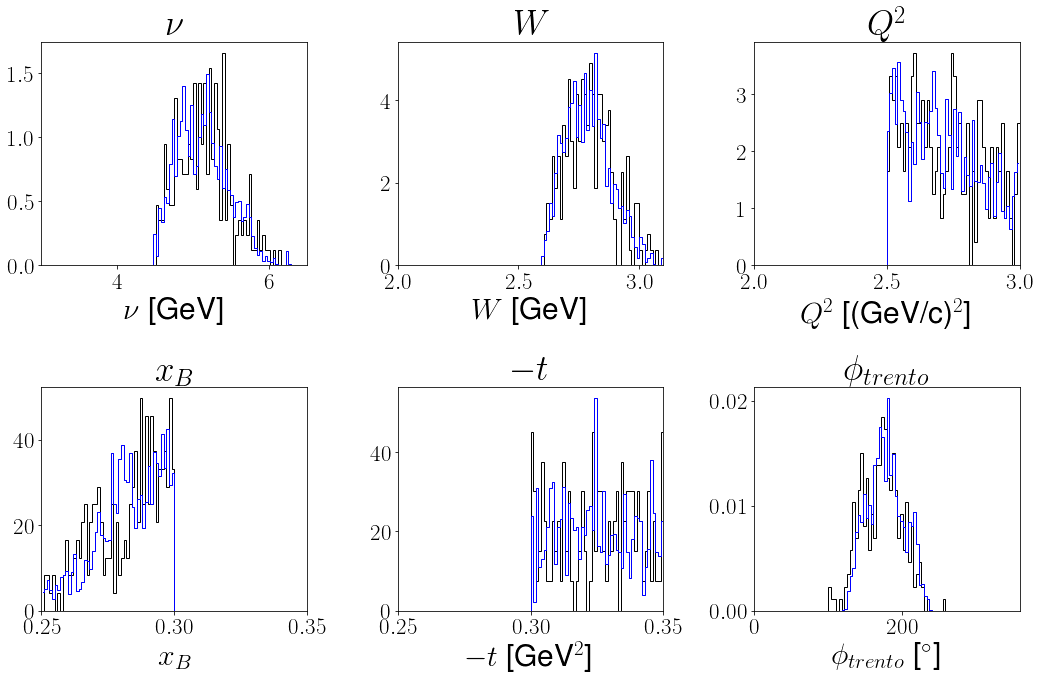

<Figure size 648x432 with 0 Axes>

In [280]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 2, 0.25, 0.25, 0]
binends = [6.5, 3.1, 3, 0.35, 0.35, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD_bin4[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD_bin4[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD_bin4/len_pi0SimInbFD_bin4*simDist_dvpi0 + (len_epgExpInbFD_bin4/len_dvcsSimInbFD_bin4-len_bkgSimInbFD_bin4/len_pi0SimInbFD_bin4*len_pi0ExpInbFD_bin4/len_dvcsSimInbFD_bin4)*simDist_dvcs
        simDist = (1-contFD_bin4)*simDist_dvcs + contFD_bin4*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbFD_bin4[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD_bin4-cont_inb_FD_bin4/len_dvcsSimInbFD_bin4)*len_epgExpInbFD_bin4*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD_bin4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD_bin4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD_bin4/len_pi0SimInbFD_bin4*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD_bin4)/len(pi0SimInbFD_bin4)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD_bin4.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

nu 5.343285556034447
xB 0.2741288584192726
W 2.8543163030966006
t2 0.32274420215951355
Q2 2.7418968796561582
phi2 143.66437794286213


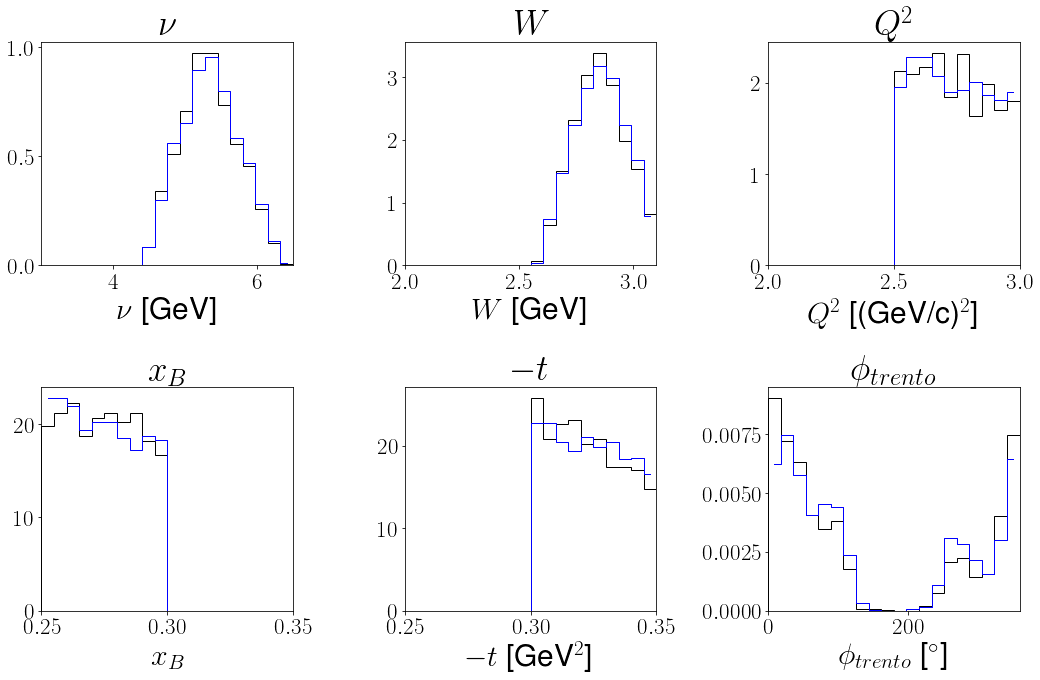

<Figure size 648x432 with 0 Axes>

In [281]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [3, 2, 2, 0.25, 0.25, 0]
binends = [6.5, 3.1, 3, 0.35, 0.35, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD_bin4[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD_bin4[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbCD_bin4/len_pi0SimInbCD_bin4*simDist_dvpi0 + (len_epgExpInbCD_bin4/len_dvcsSimInbCD_bin4-len_bkgSimInbCD_bin4/len_pi0SimInbCD_bin4*len_pi0ExpInbCD_bin4/len_dvcsSimInbCD_bin4)*simDist_dvcs
        simDist = (1-contCD_bin4)*simDist_dvcs + contCD_bin4*simDist_dvpi0
        expDist, bins = np.histogram(epgExpInbCD_bin4[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
#         axs[yind, xind].step(bincenters, c*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbCD_bin4-cont_inb_CD_bin4/len_dvcsSimInbCD_bin4)*len_epgExpInbCD_bin4*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbCD_bin4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbCD_bin4[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbCD_bin4/len_pi0SimInbCD_bin4*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbCD_bin4)/len(pi0SimInbCD_bin4)*simDist_dvpi0, bins))
#         axs[yind, xind].step(bincenters, (1-c)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineCD_bin4.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [142]:
for i in binscenters*np.pi/180:
    print("./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi {}| grep averaged".format(i))

./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.15707963267948966| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.47123889803846897| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.7853981633974483| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 1.0995574287564276| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 1.413716694115407| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 1.7278759594743864| grep averaged
./dvcsgen --x 0.28 0.28 --q2 2.7 2.7 --t 0.32 0.32 --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 2.0420352248333655| grep 

In [161]:
Frad = [0.93192610527442243, 0.93573729797122074, 0.93836216072615475, 0.93639557684002550, 0.93190228357459826, 0.92608020837833327, 0.92052766402421193, 0.91590850138247759, 0.91262536286940388, 0.91076123813534560, 0.91081438231635548, 0.91265697974682980, 0.91575810741521624, 0.92057378739325035, 0.92622236887557430, 0.93187310235459775, 0.93679213620970714, 0.93849266713239521, 0.93619127172259320, 0.93193267161476989]
bh =  [ 0.05206, 0.04693, 0.04008, 0.03297, 0.02653, 0.02116, 0.01687, 0.01354, 0.01099, 0.00905, 0.00758, 0.00648, 0.00565, 0.00504, 0.00461, 0.00432, 0.00415, 0.00409, 0.00415, 0.00432, 0.00461, 0.00504, 0.00565, 0.00648, 0.00758, 0.00905, 0.01099, 0.01354, 0.01687, 0.02116, 0.02653, 0.03297, 0.04008, 0.04693, 0.05206, 0.05399]
dvcs = [  0.03983, 0.03868, 0.03698, 0.03498, 0.03287, 0.03077, 0.02877, 0.02693, 0.02526, 0.02377, 0.02248, 0.02136, 0.02043, 0.01968, 0.01910, 0.01868, 0.01844, 0.01835, 0.01844, 0.01868, 0.01910, 0.01968, 0.02043, 0.02136, 0.02248, 0.02377, 0.02526, 0.02693, 0.02877, 0.03077, 0.03287, 0.03498, 0.03698, 0.03868, 0.03983, 0.04024]

In [193]:
bins = np.linspace(0, 360, 21)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])
gen = np.array([1890, 1748, 1549, 1322, 1150,  990,  859,  772,  804,  748,  730, 773,  782,  797, 1044, 1120, 1339, 1606, 1717, 1896])
expDistFD, bins = np.histogram(epgExpInbFD_bin4.phi2, bins = bins)
simDistFD_dvpi0, bins = np.histogram(bkgSimInbFD_bin4.phi2, bins = bins)
simDistFD_dvcs, bins = np.histogram(dvcsSimInbFD_bin4.phi2, bins = bins)
dvcsFD = expDistFD - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDistFD_dvpi0

expDistCD, bins = np.histogram(epgExpInbCD_bin4.phi2, bins = bins)
simDistCD_dvpi0, bins = np.histogram(bkgSimInbCD_bin4.phi2, bins = bins)
simDistCD_dvcs, bins = np.histogram(dvcsSimInbCD_bin4.phi2, bins = bins)
dvcsCD = expDistCD - len(pi0ExpInbCD)/len(pi0SimInbCD)*simDistCD_dvpi0


In [282]:
accFD = simDistFD_dvcs/gen
accCorrectedSigFD = copy(accFD)
accCorrectedUncFD = copy(accFD)
for it, val in enumerate(accFD):
    if val <0.005:
        accCorrectedSigFD[it] = 0
        accCorrectedUncFD[it] = 0
    elif dvcsFD[it]<=0:
        accCorrectedSigFD[it] = 0
        accCorrectedUncFD[it] = 0
    else:
        accCorrectedSigFD[it] = dvcsFD[it]/val#simDist_dvcs[it]/val
        accCorrectedUncFD[it] = np.sqrt(1/expDistFD[it] + (1/expDistFD[it])*(1+contFD_bin4)*(contFD_bin4/(1-contFD_bin4))**2 + (1-val)/val/gen[it])

accCD = simDistCD_dvcs/gen
accCorrectedSigCD = copy(accCD)
accCorrectedUncCD = copy(accCD)
for it, val in enumerate(accCD):
    if val <0.02:
        accCorrectedSigCD[it] = 0
        accCorrectedUncCD[it] = 0
    elif dvcsCD[it]<=0:
        accCorrectedSigCD[it] = 0
        accCorrectedUncCD[it] = 0
    else:
        accCorrectedSigCD[it] = dvcsCD[it]/val#simDist_dvcs[it]/val
        accCorrectedUncCD[it] = np.sqrt(1/expDistCD[it] + (1/expDistCD[it])*(1+contCD_bin4)*(contCD_bin4/(1-contCD_bin4))**2+ 1/simDistCD_dvcs[it] + (1-val)/val/gen[it])

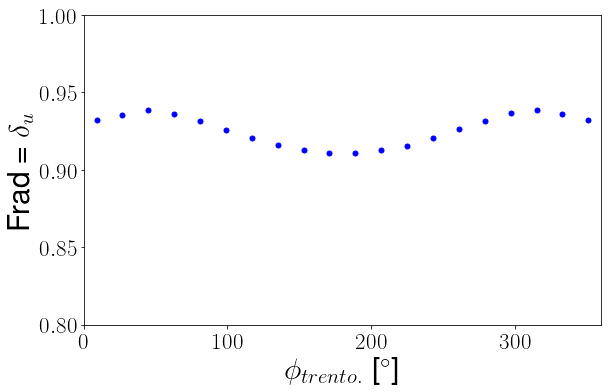

In [196]:
plt.errorbar(binscenters, Frad, color='b', fmt='.', markersize=10)
plt.xlim([0, 360])
plt.ylim([0.8, 1])
plt.ylabel("Frad = "+r"$\delta_u$")
plt.xlabel(r"$\phi_{trento.}$"+" ["+degree+"]")
plt.show()

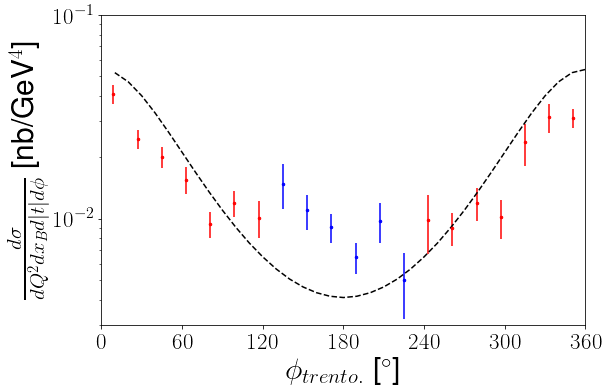

In [283]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30
bhphi = [10*i+10 for i in range(36)]
plt.errorbar(binscenters, accCorrectedSigFD/56.5/0.05/0.5/0.1/(np.pi*2/20)/10**6/Frad, yerr = accCorrectedSigFD/56.5/0.05/0.5/0.1/(np.pi*2/20)/10**6*accCorrectedUncFD/Frad, color='b', fmt='.', markersize=5)
plt.errorbar(binscenters, accCorrectedSigCD/56.5/0.05/0.5/0.1/(np.pi*2/20)/10**6/Frad, yerr = accCorrectedSigCD/56.5/0.05/0.5/0.1/(np.pi*2/20)/10**6*accCorrectedUncCD/Frad, color='r', fmt='.', markersize=5)
plt.plot(bhphi, bh, color = 'k', linestyle = '--')
# plt.plot(bhphi, dvcs, color = 'k', linestyle = '--')
# plt.plot(binscenters, accCorrectedSig/40000)
# plt.ylim([0.00001,1])
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.xlabel(r"$\phi_{trento.}$"+" ["+degree+"]")
plt.xticks(np.linspace(0, 360, 7))
plt.xlim([0, 360])
plt.ylim([0.005, 0.1])
plt.tick_params(axis='y', which='minor')
plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter("%.1f"))
plt.yticks([0.003, 0.01, 0.03, 0.1])
plt.yscale('log')
plt.show()

In [154]:
simDistFD_dvcs/gen

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04404145, 0.07960199, 0.14438503,
       0.13835616, 0.06856404, 0.04092072, 0.00250941, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [4]:
parent_epg = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/epg/"
# parent_MC = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/dvcs/"
# parent_MC_bkg1g = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/bkg_1g/"
# parent_MC_bkg2g = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/bkg_2g/"
# parent_exp = "/Volumes/Extreme SSD/nov2021/convPkl_Dec/exp/"

# df_3063_corr = pd.read_pickle(parent_MC + "3063.pkl")
# df_3987_corr = pd.read_pickle(parent_MC + "3987.pkl")
# df_3274_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3274.pkl")
# df_3274_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3274.pkl")

# df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
# df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")

# df_3292_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3292.pkl")
# df_3292_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3292.pkl")


# df_4013_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4013.pkl")
# df_4013_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4013.pkl")

# df_4076_1g_corr = pd.read_pickle(parent_MC_bkg1g + "4076.pkl")
# df_4076_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4076.pkl")

# exp_1g_corr = pd.read_pickle(parent_exp + "dvcs.pkl")
# exp_2g_corr = pd.read_pickle(parent_exp + "pi0.pkl")

epg_3987 = pd.read_pickle(parent_epg + "3987" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [47]:
dvcsSimInb = epg_3987
bkgSimInb = epg_4076

In [49]:
print(len(dvcsSimInb), len(bkgSimInb))

4911767 8266121


In [50]:
dvcsSimInb.loc[dvcsSimInb.event.duplicated(), :]

,Epx,Epy,Epz,Evx,Evy,Evz,Esector,Eedep,Eedep1,Eedep2,...,GenGpz,GenGp,GenGp2,GenGpx2,GenGpy2,GenGpz2,GenGtheta,GenGphi,GenGtheta2,GenGphi2
7,0.402545,-0.604949,1.249264,-0.491373,-0.283325,-2.745331,6,0.383450,0.339399,0.044051,...,8.7951,8.803785,0.255400,0.0000,0.0000,0.2554,2.545111,162.139750,0.000000,0.000000
10,-0.618492,0.977787,5.006869,0.162966,0.094461,-2.903978,3,1.275240,0.900815,0.355482,...,6.4207,6.420700,5.233941,0.3299,-0.4694,5.2024,0.000000,0.000000,6.293291,-54.899987
12,0.077602,0.541200,1.789760,0.062317,-0.030567,-1.708503,2,0.449620,0.300790,0.148830,...,8.5218,8.524786,0.424021,-0.0817,-0.0338,0.4147,1.516583,-63.378165,12.035482,-157.524695
17,0.104972,0.809785,2.352447,-0.430318,0.031805,-0.264533,2,0.571225,0.425476,0.145749,...,7.9460,7.974344,1.031900,0.0000,0.0000,1.0319,4.832247,-74.085066,0.000000,0.000000
19,0.481055,-0.191463,0.976957,-0.461684,-1.064869,-0.260997,6,0.281416,0.237985,0.043431,...,8.9787,9.027148,0.274647,0.1087,-0.0032,0.2522,5.938746,-173.186950,23.325408,-1.686233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911751,1.147375,0.096475,7.467181,-0.531594,6.253702,-12.603432,1,1.706160,1.320038,0.367701,...,NaN,NaN,3.001515,-1.1280,-0.5793,2.7205,NaN,NaN,24.990806,-152.816609
4911752,1.147375,0.096475,7.467181,-0.531594,6.253702,-12.603432,1,1.706160,1.320038,0.367701,...,NaN,NaN,3.001515,-1.1280,-0.5793,2.7205,NaN,NaN,24.990806,-152.816609
4911753,1.147375,0.096475,7.467181,-0.531594,6.253702,-12.603432,1,1.706160,1.320038,0.367701,...,NaN,NaN,3.001515,-1.1280,-0.5793,2.7205,NaN,NaN,24.990806,-152.816609
4911754,1.147375,0.096475,7.467181,-0.531594,6.253702,-12.603432,1,1.706160,1.320038,0.367701,...,NaN,NaN,3.001515,-1.1280,-0.5793,2.7205,NaN,NaN,24.990806,-152.816609


In [55]:
dvcsSimInb.loc[dvcsSimInb.event==6, "Ge"]

6    8.457720
7    0.144854
Name: Ge, dtype: float64

In [56]:
dvcsSimInb = dvcsSimInb.sort_values(by=['Ge', 'Pe'], ascending = [False, False])
dvcsSimInb = dvcsSimInb.loc[~dvcsSimInb.event.duplicated(), :]
dvcsSimInb = dvcsSimInb.sort_values(by='event')

bkgSimInb = bkgSimInb.sort_values(by=['Ge', 'Pe'], ascending = [False, False])
bkgSimInb = bkgSimInb.loc[~bkgSimInb.event.duplicated(), :]
bkgSimInb = bkgSimInb.sort_values(by='event')

KeyboardInterrupt: 

In [57]:
dvcsSimInb.loc[dvcsSimInb.event==6, "Ge"]

6    8.45772
Name: Ge, dtype: float64

In [58]:
print(len(dvcsSimInb))#, len(bkgSimInb))

3832897


In [18]:
dvcsSimInbFD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector<7)&(dvcsSimInb.Ptheta<32))& (dvcsSimInb.Gsector<7)])
bkgSimInbFD = copy(bkgSimInb.loc[((bkgSimInb.Psector<7)&(bkgSimInb.Ptheta<32))& (bkgSimInb.Gsector<7)])

dvcsSimInbCD = copy(dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector<7)])
bkgSimInbCD = copy(bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector<7)])
# 
dvcsSimInbCDFT = dvcsSimInb.loc[((dvcsSimInb.Psector>7)&(dvcsSimInb.Ptheta<60))& (dvcsSimInb.Gsector>7)]
bkgSimInbCDFT = bkgSimInb.loc[((bkgSimInb.Psector>7)&(bkgSimInb.Ptheta<60))& (bkgSimInb.Gsector>7)]

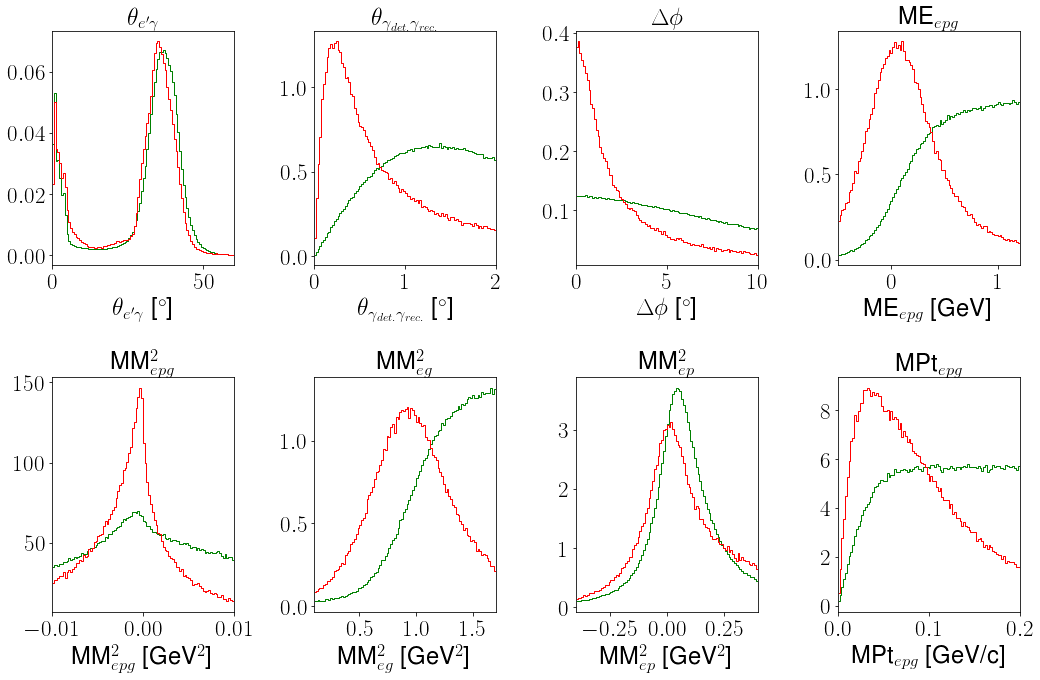

<Figure size 432x288 with 0 Axes>

In [39]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
#         simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
#         expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

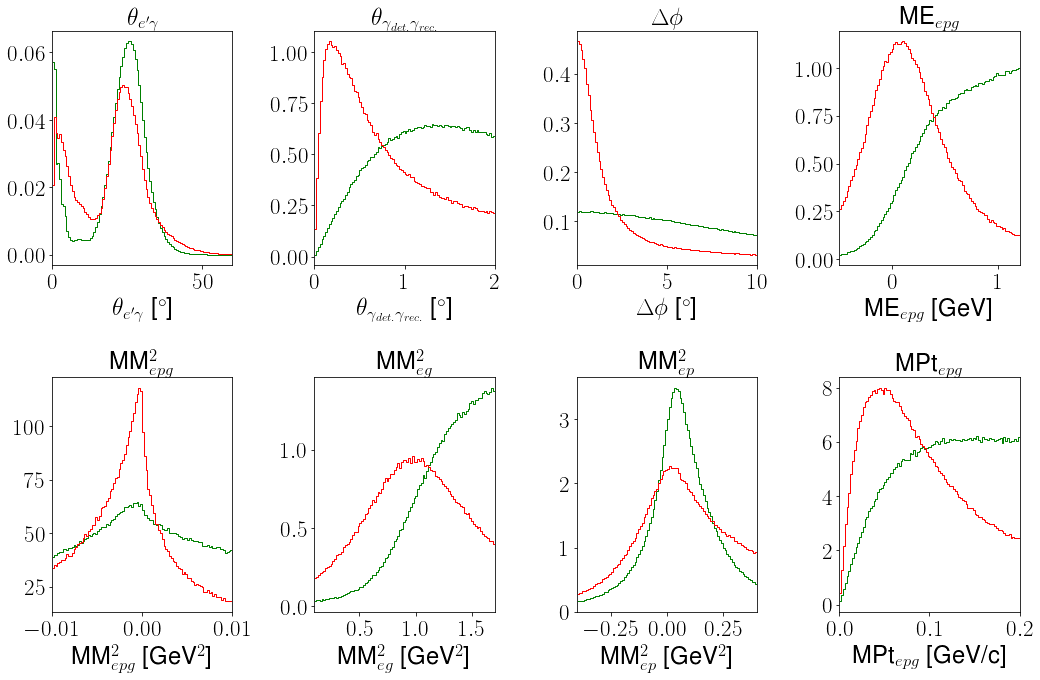

<Figure size 432x288 with 0 Axes>

In [38]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
#         simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
#         expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

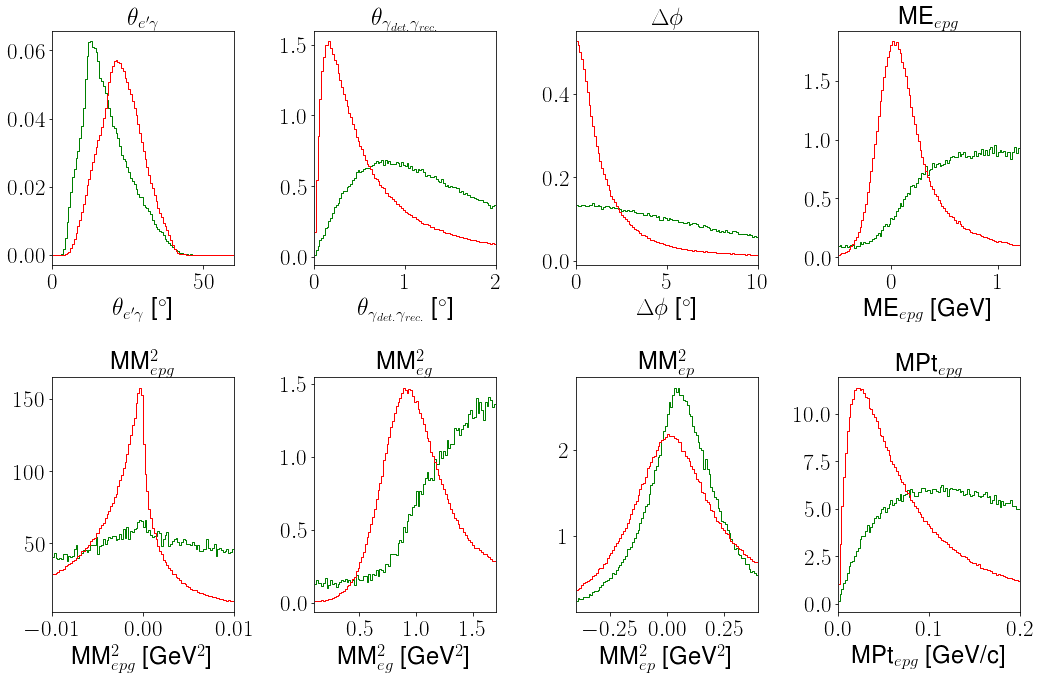

<Figure size 432x288 with 0 Axes>

In [37]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [60, 2, 10, 1.2, 0.01, 1.7, 0.4, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
#         simDist = (1-contFD)*simDist_dvcs + contFD*simDist_dvpi0
#         expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
#         axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
#         print(varstoplot[ind], nphistmean(expDist - len(pi0ExpInbFD)/len(pi0SimInbFD)*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

<AxesSubplot:>

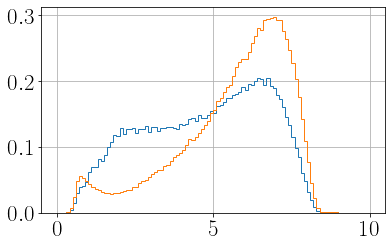

In [28]:
dvcsSimInbFD.Ee.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
bkgSimInbFD.Ee.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step')

<AxesSubplot:>

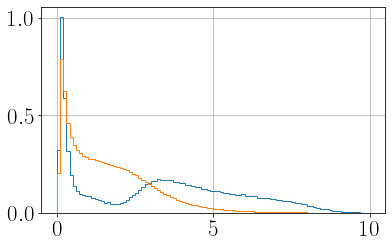

In [29]:
dvcsSimInbFD.Ge.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step')
bkgSimInbFD.Ge.hist(bins = np.linspace(0, 10, 101), density = True, histtype = 'step')

<AxesSubplot:>

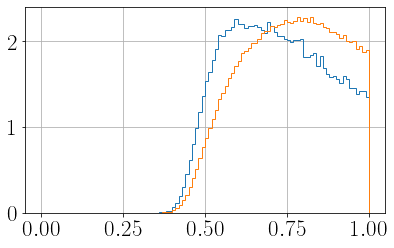

In [30]:
dvcsSimInbFD.Pp.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step')
bkgSimInbFD.Pp.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step')

<AxesSubplot:>

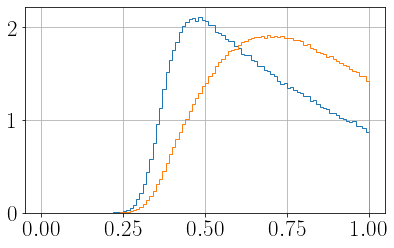

In [31]:
dvcsSimInbCD.Pp.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step')
bkgSimInbCD.Pp.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step')

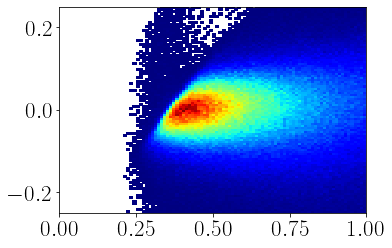

In [35]:
plt.hist2d(dvcsSimInbCD.Pp, dvcsSimInbCD.Pp - dvcsSimInbCD.GenPp, bins = [np.linspace(0, 1, 101), np.linspace(-0.25, 0.25, 101)], cmap = cmap, cmin = 1)
plt.show()

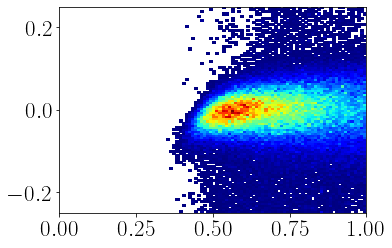

In [36]:
plt.hist2d(dvcsSimInbFD.Pp, dvcsSimInbFD.Pp - dvcsSimInbFD.GenPp, bins = [np.linspace(0, 1, 101), np.linspace(-0.25, 0.25, 101)], cmap = cmap, cmin = 1)
plt.show()

<AxesSubplot:>

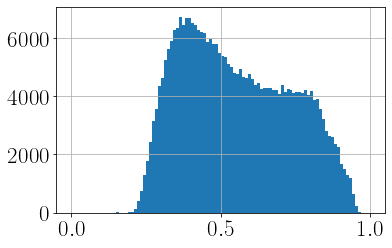

In [41]:
dvcsSimInbFD.y.hist(bins = np.linspace(0, 1, 101))

<AxesSubplot:>

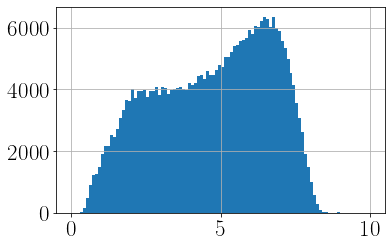

In [43]:
dvcsSimInbFD.Ep.hist(bins = np.linspace(0, 10, 101))

<AxesSubplot:>

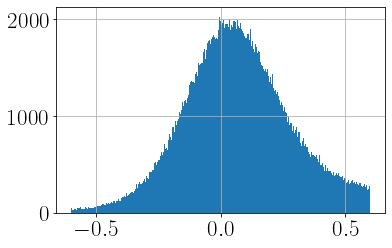

In [129]:
dvcsSimInbCDFT.MM2_ep.hist(bins = 301)